In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import set_style

In [2]:
raw = pd.read_csv("sp500.csv")
raw = raw.iloc[::-1].reset_index(drop=True)
raw

,Date,Close/Last,Open,High,Low
0,10/28/2013,1762.11,1759.42,1764.99,1757.67
1,10/29/2013,1771.95,1762.93,1772.09,1762.93
2,10/30/2013,1763.31,1772.27,1775.22,1757.24
3,10/31/2013,1756.54,1763.24,1768.53,1755.72
4,11/01/2013,1761.64,1758.70,1765.67,1752.70
...,...,...,...,...,...
2533,10/23/2023,4217.04,4210.40,4255.84,4189.22
2534,10/24/2023,4247.68,4235.79,4259.38,4219.43
2535,10/25/2023,4186.77,4232.42,4232.42,4181.42
2536,10/26/2023,4137.23,4175.99,4183.60,4127.90


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2538 non-null   object 
 1   Close/Last  2538 non-null   float64
 2   Open        2538 non-null   float64
 3   High        2538 non-null   float64
 4   Low         2538 non-null   float64
dtypes: float64(4), object(1)
memory usage: 99.3+ KB


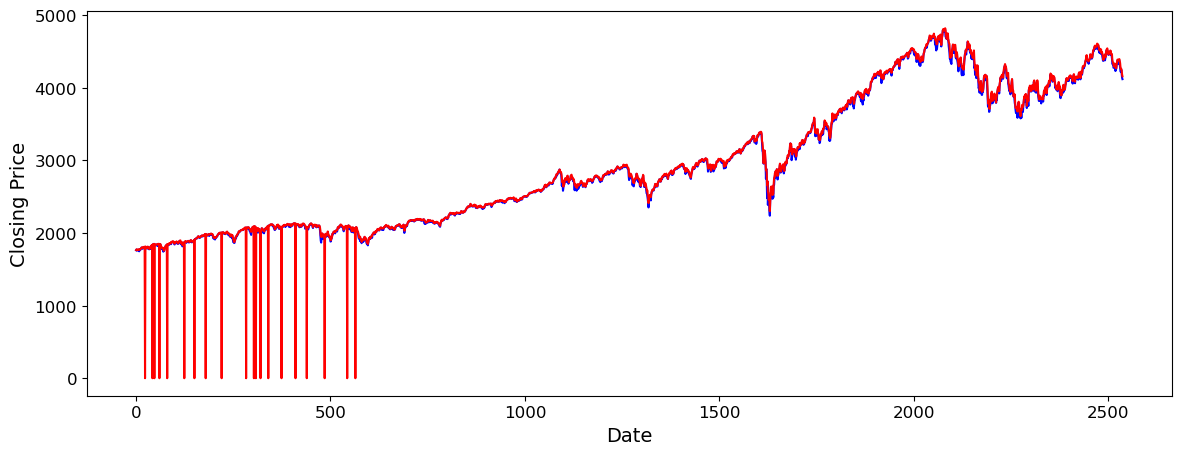

In [4]:
plt.figure(figsize=(14,5))

plt.plot(raw['Close/Last'], color='blue', label='close')
plt.plot(raw['High'], color='red', label='open')


plt.xlabel("Date", fontsize=14)
plt.ylabel("Closing Price", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [5]:
raw[raw["High"]==0]

,Date,Close/Last,Open,High,Low
23,11/28/2013,1807.23,0.0,0.0,0.0
42,12/25/2013,1833.32,0.0,0.0,0.0
47,01/01/2014,1848.36,0.0,0.0,0.0
60,01/20/2014,1838.70,0.0,0.0,0.0
80,02/17/2014,1838.63,0.0,0.0,0.0
124,04/18/2014,1864.85,0.0,0.0,0.0
150,05/26/2014,1900.53,0.0,0.0,0.0
179,07/04/2014,1985.44,0.0,0.0,0.0
220,09/01/2014,2003.37,0.0,0.0,0.0
283,11/27/2014,2072.83,0.0,0.0,0.0


In [3]:
data=raw[raw["High"]!=0].reset_index(drop=True)

data.rename(columns={'Close/Last': 'Close'}, inplace=True)

data['Date'] = pd.to_datetime(data['Date'])

data['HiLo']=data['High']-data['Low']

data['OpCl']= data['Close'] - data['Open']

data['overnight']=data['Open']-data['Close'].shift(1)

In [7]:
data

,Date,Close,Open,High,Low,HiLo,OpCl,overnight
0,2013-10-28,1762.11,1759.42,1764.99,1757.67,7.32,2.69,NaN
1,2013-10-29,1771.95,1762.93,1772.09,1762.93,9.16,9.02,0.82
2,2013-10-30,1763.31,1772.27,1775.22,1757.24,17.98,-8.96,0.32
3,2013-10-31,1756.54,1763.24,1768.53,1755.72,12.81,-6.70,-0.07
4,2013-11-01,1761.64,1758.70,1765.67,1752.70,12.97,2.94,2.16
...,...,...,...,...,...,...,...,...
2513,2023-10-23,4217.04,4210.40,4255.84,4189.22,66.62,6.64,-13.76
2514,2023-10-24,4247.68,4235.79,4259.38,4219.43,39.95,11.89,18.75
2515,2023-10-25,4186.77,4232.42,4232.42,4181.42,51.00,-45.65,-15.26
2516,2023-10-26,4137.23,4175.99,4183.60,4127.90,55.70,-38.76,-10.78


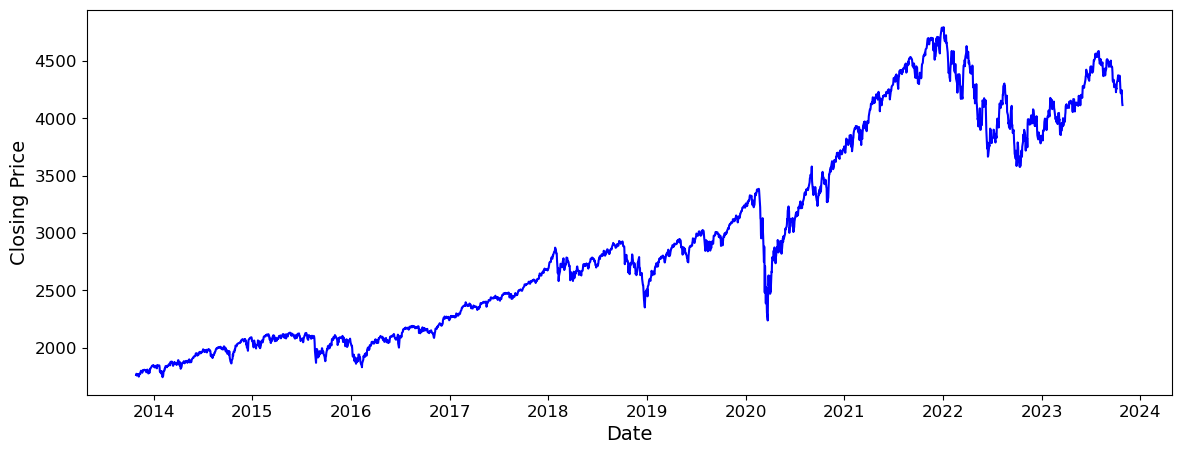

In [8]:
plt.figure(figsize=(14,5))

plt.plot(data['Date'],data['Close'], color='blue', label='close')

plt.xlabel("Date", fontsize=14)
plt.ylabel("Closing Price", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

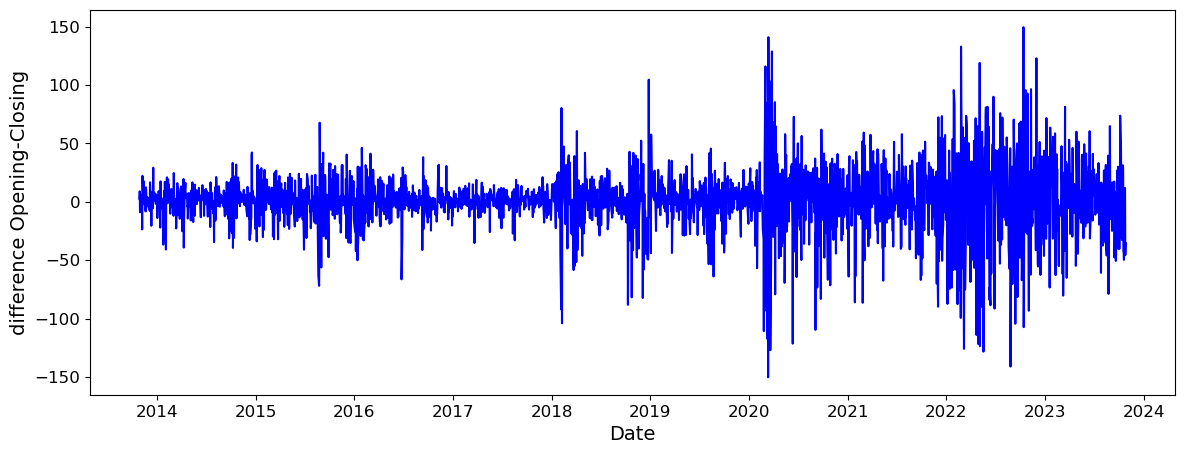

In [9]:
plt.figure(figsize=(14,5))

plt.plot(data['Date'],data['OpCl'], color='blue', label='close')


plt.xlabel("Date", fontsize=14)
plt.ylabel("difference Opening-Closing", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

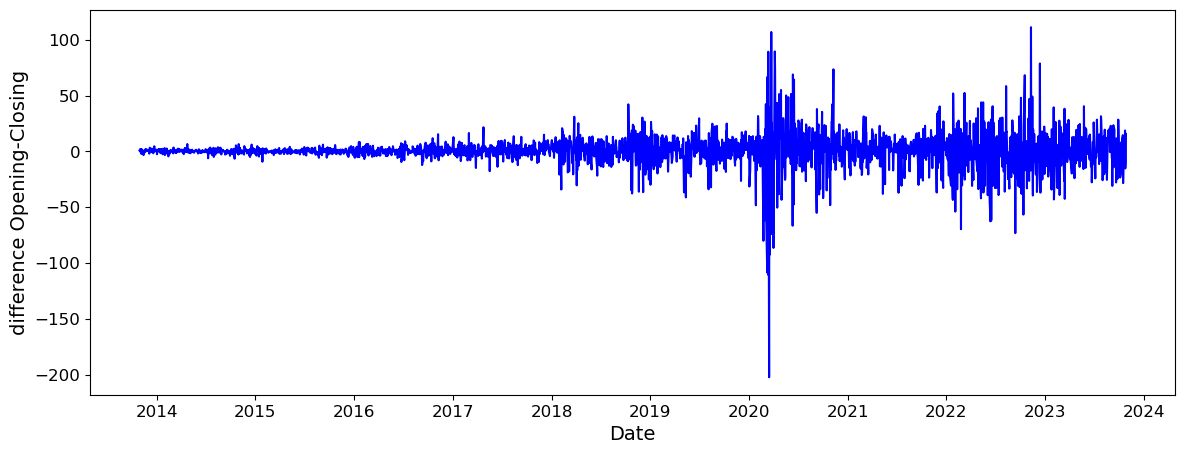

In [10]:
plt.figure(figsize=(14,5))

plt.plot(data['Date'],data['overnight'], color='blue', label='close')

plt.xlabel("Date", fontsize=14)
plt.ylabel("difference Opening-Closing", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [11]:
data['overnight'].idxmin()

1605

In [12]:
data[data['overnight']==data['overnight'].min()]

,Date,Close,Open,High,Low,HiLo,OpCl,overnight
1605,2020-03-16,2386.13,2508.59,2562.98,2380.94,182.04,-122.46,-202.43


In [13]:
data.iloc[ data['overnight'].idxmin() - 2:data['overnight'].idxmin() + 2]

,Date,Close,Open,High,Low,HiLo,OpCl,overnight
1603,2020-03-12,2480.64,2630.86,2660.95,2478.86,182.09,-150.22,-110.52
1604,2020-03-13,2711.02,2569.99,2711.33,2492.37,218.96,141.03,89.35
1605,2020-03-16,2386.13,2508.59,2562.98,2380.94,182.04,-122.46,-202.43
1606,2020-03-17,2529.19,2425.66,2553.93,2367.04,186.89,103.53,39.53


In [14]:
#######################################################################################################
#######################################################################################################

In [15]:
################################# Models; data seem to have a trent ###################################

In [4]:
# Split the data into training set and test set
testsize = 14
data_train = data.iloc[:-testsize].copy()
data_test = data.iloc[-testsize:].copy()

##### The average forecast

In [5]:
# Close
train_close_avg = data_train.Close.mean()

# OpCl
train_OpCl_avg = data_train.OpCl.mean()

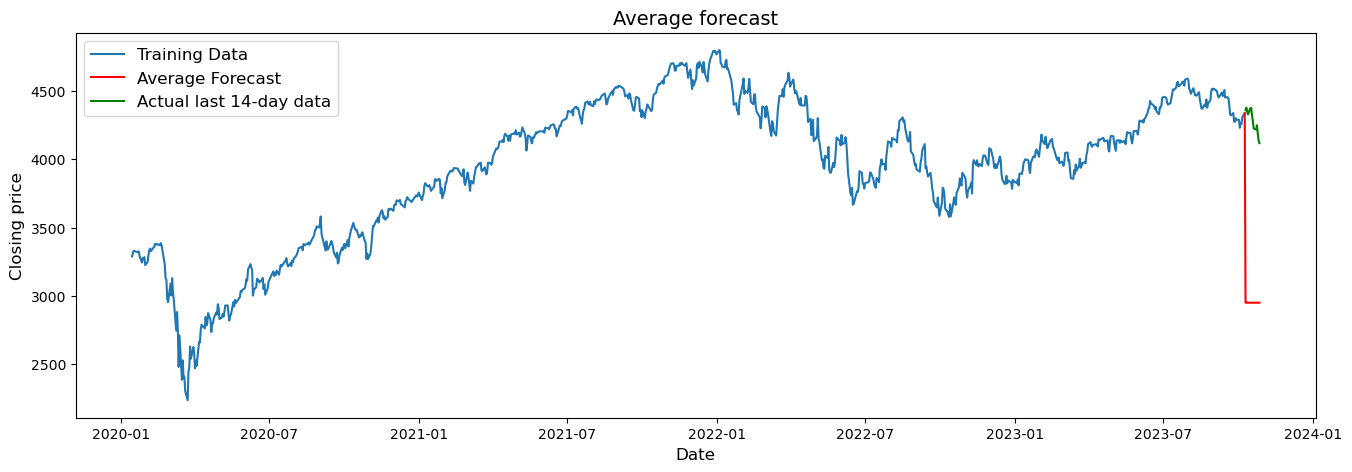

In [18]:
# Close

plt.figure(figsize=(16,5))

# plt.plot(data_train.Date, data_train.Close, label="Training Data")

filtered_data = data_train[data_train['Date'] >= '2020-01-15']

plt.plot(filtered_data['Date'], 
         filtered_data['Close'],
           # '-o',
            label = "Training Data")


# Find the last date in the training data
last_training_date = data_train.Date.iloc[-1]

# Plot the 14-day average forecast using a line and connect it to the last training data point
plt.plot([last_training_date] + data_test.Date.tolist(), 
         [data_train.Close.iloc[-1]] + [train_close_avg] * testsize, 
         color='red', 
         #linestyle='--', 
         label="Average Forecast")

# plt.scatter(data_test.Date,
#             train_close_avg*np.ones(14),
#             marker='x',
#             s=150,
#             color='red',
#             label="Average Forecast")


# plot the actual data of the last 14 days
plt.plot(data_test.Date, data_test.Close, color='green', label="Actual last "+str(testsize)+"-day data")

plt.legend(fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing price", fontsize=12)

plt.title("Average forecast", fontsize=14)

    
plt.show()

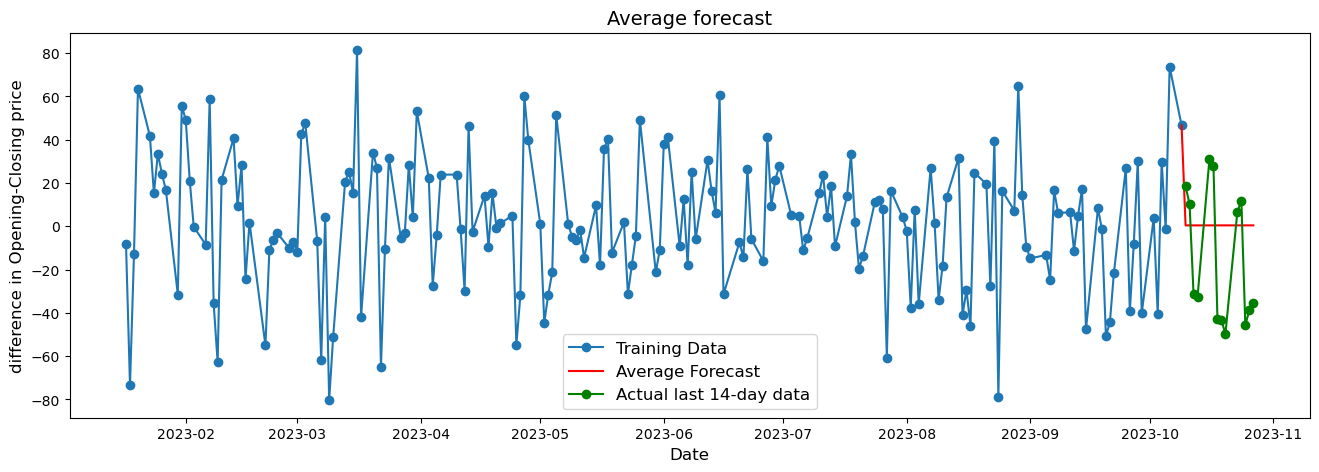

In [19]:
# OpCl

plt.figure(figsize=(16,5))

# plt.plot(data_train.Date, data_train.Close, label="Training Data")

filtered_data = data_train[data_train['Date'] >= '2023-01-15']

plt.plot(filtered_data['Date'], 
         filtered_data['OpCl'],
           '-o',
            label = "Training Data")


# Find the last date in the training data
last_training_date = data_train.Date.iloc[-1]

# Plot the testsize-day average forecast using a line and connect it to the last training data point
plt.plot([last_training_date] + data_test.Date.tolist(), 
         [data_train.OpCl.iloc[-1]] + [train_OpCl_avg] * testsize, 
         color='red', 
         #linestyle='--', 
         label="Average Forecast")

# plt.scatter(data_test.Date,
#             train_OpCl_avg*np.ones(14),
#             marker='x',
#             s=150,
#             color='red',
#             label="Average Forecast")


# plot the actual data of the last 14 days
plt.plot(data_test.Date, data_test.OpCl, '-o', color='green',  label="Actual last "+str(testsize)+"-day data")

plt.legend(fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("difference in Opening-Closing price", fontsize=12)

plt.title("Average forecast", fontsize=14)
    
plt.show()

##### The naive forecast

In [6]:
#Close
naive_close = data_train.Close.values[-1]
#OpCl
naive_OpCl = data_train.OpCl.values[-1]

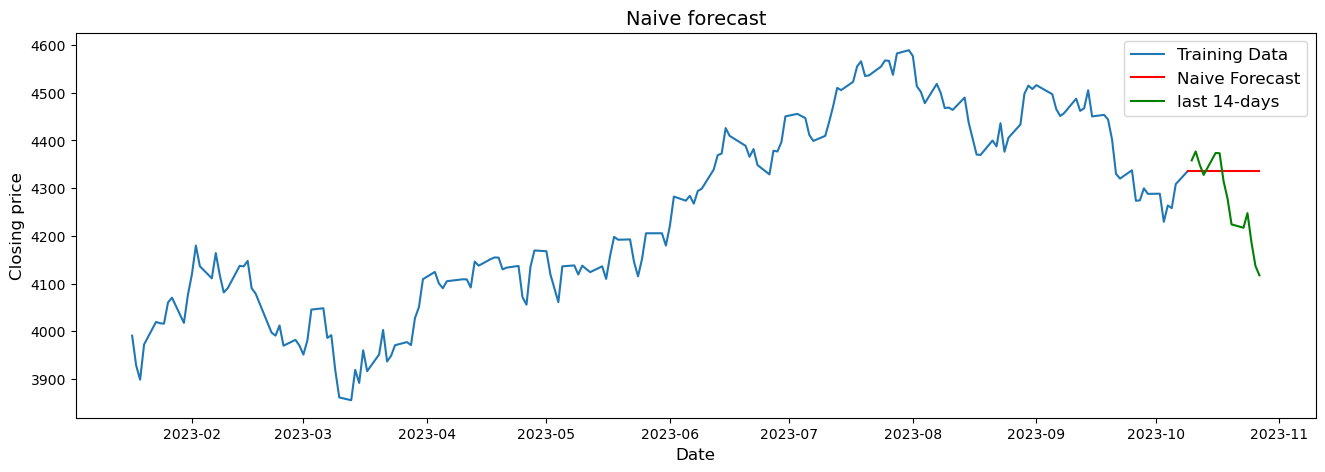

In [21]:
# Close

plt.figure(figsize=(16,5))

filtered_data = data_train[data_train['Date'] >= '2023-01-15']

plt.plot(filtered_data['Date'], 
         filtered_data['Close'],
           # '-o',
            label = "Training Data")

# predict
plt.plot([last_training_date] + data_test.Date.tolist(), 
         [data_train.Close.iloc[-1]] + [naive_close] * testsize, 
         color='red', 
         #linestyle='--', 
         label="Naive Forecast")

# plot the actual data of the last testsize days
plt.plot(data_test.Date, data_test.Close, color='green', label="last " + str(testsize) + "-days")


plt.legend(fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing price", fontsize=12)

plt.title("Naive forecast", fontsize=14)
    
plt.show()

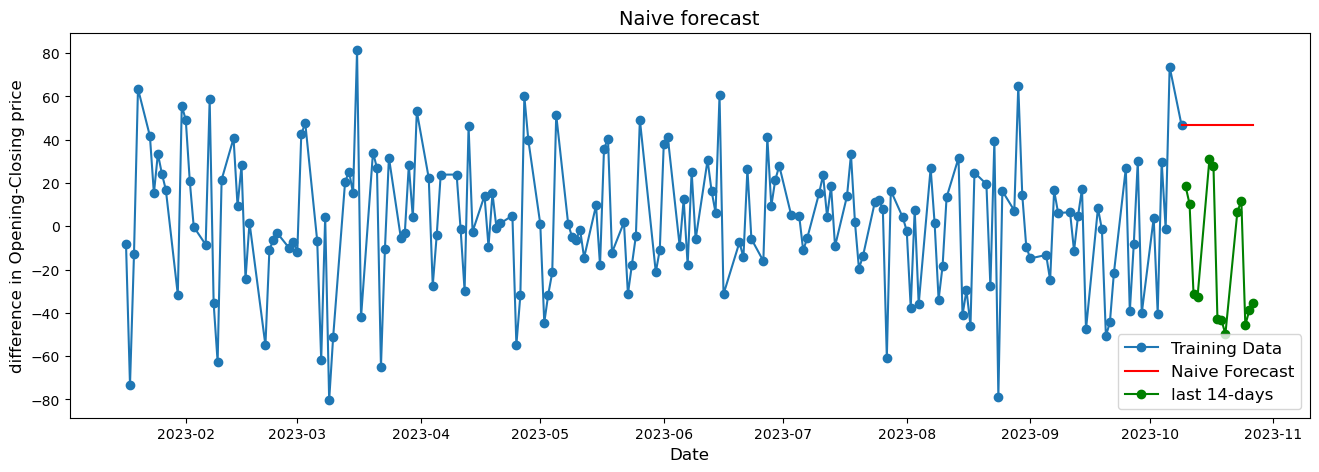

In [22]:
# OpCl

plt.figure(figsize=(16,5))

filtered_data = data_train[data_train['Date'] >= '2023-01-15']

plt.plot(filtered_data['Date'], 
         filtered_data['OpCl'],
           '-o',
            label = "Training Data")

# predict
plt.plot([last_training_date] + data_test.Date.tolist(), 
         [data_train.OpCl.iloc[-1]] + [naive_OpCl] * testsize, 
         color='red', 
         #linestyle='--', 
         label="Naive Forecast")

# plot the actual data of the last 14 days
plt.plot(data_test.Date, data_test.OpCl, '-o', color='green', label="last " + str(testsize) + "-days")


plt.legend(fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("difference in Opening-Closing price", fontsize=12)

plt.title("Naive forecast", fontsize=14)

    
plt.show()

##### The trend forecast

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
slr1 = LinearRegression()
slr2 = LinearRegression()

#Close
slr1.fit(np.arange(1, len(data_train) + 1).reshape(-1,1),
        data_train.Close)

trend_close_pred = slr1.predict(np.arange(len(data_train)+1, len(data_test) + len(data_train) + 1).reshape(-1,1))

#OpCl
slr2.fit(np.arange(1, len(data_train) + 1).reshape(-1,1),
        data_train.OpCl)

trend_OpCl_pred = slr2.predict(np.arange(len(data_train)+1, len(data_test) + len(data_train) + 1).reshape(-1,1))

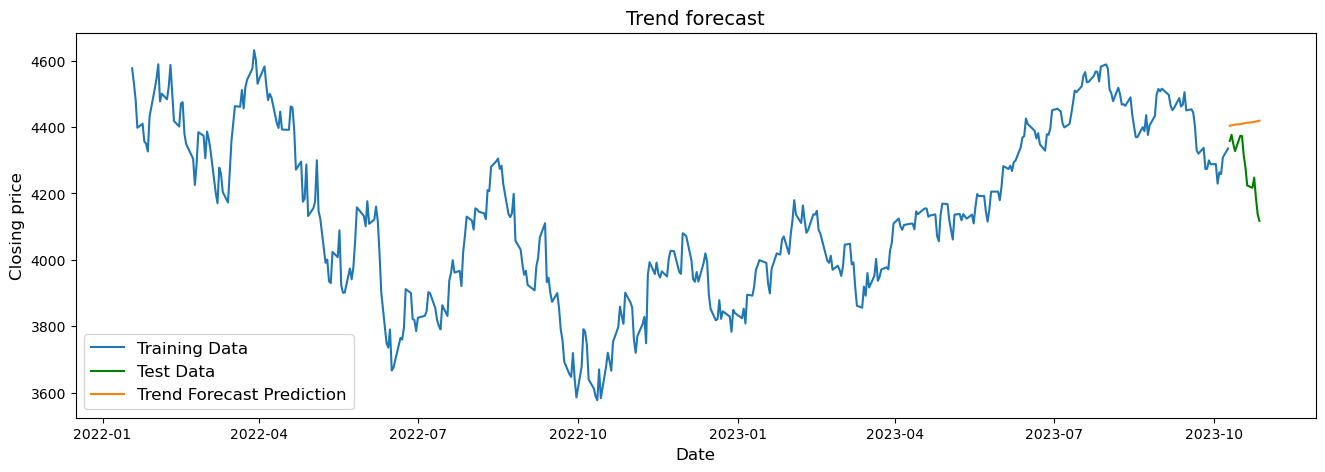

In [25]:
# Close

plt.figure(figsize=(16,5))

filtered_data = data_train[data_train['Date'] >= '2022-01-15']

plt.plot(filtered_data['Date'], 
         filtered_data['Close'],
           #'-o',
            label = "Training Data")

plt.plot(data_test.Date,
            data_test.Close,
            color = 'green',
            label="Test Data")

plt.plot(data_test.Date,
            trend_close_pred,
            #'r--',
            label="Trend Forecast Prediction")


plt.legend(fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing price", fontsize=12)

plt.title("Trend forecast", fontsize=14)

    
plt.show()

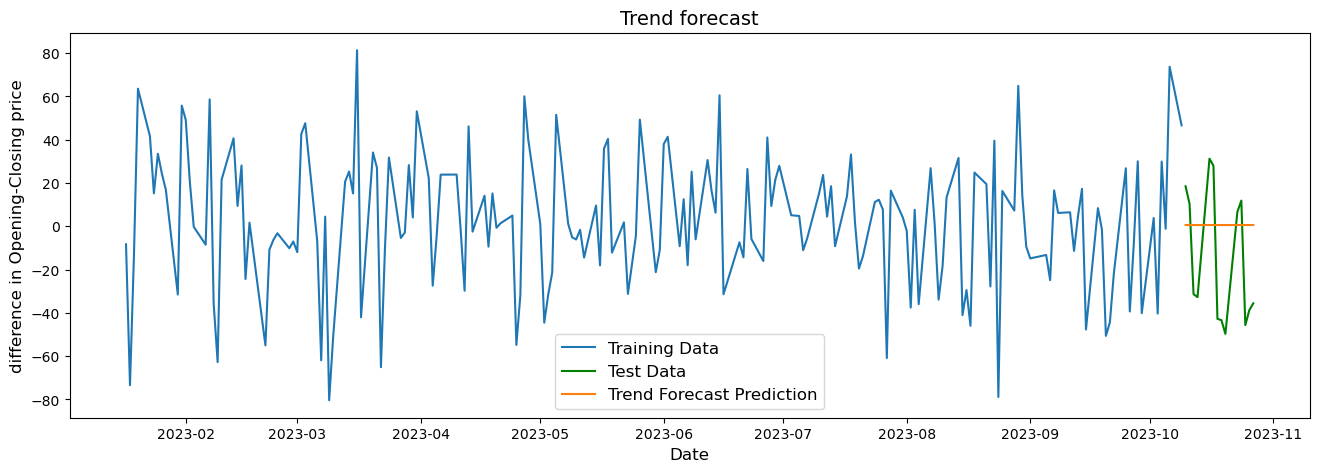

In [26]:
# OpCl

plt.figure(figsize=(16,5))

filtered_data = data_train[data_train['Date'] >= '2023-01-15']

plt.plot(filtered_data['Date'], 
         filtered_data['OpCl'],
           #'-o',
            label = "Training Data")

plt.plot(data_test.Date,
            data_test.OpCl,
            color = 'green',
            label="Test Data")

plt.plot(data_test.Date,
            trend_OpCl_pred,
            #'r--',
            label="Trend Forecast Prediction")


plt.legend(fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("difference in Opening-Closing price", fontsize=12)

plt.title("Trend forecast", fontsize=14)
    
plt.show()

##### Random walk with drift forecast

In [27]:
# Close
beta_hat_1 = data_train.Close.diff().mean()

drift_pred_1 = data_train.Close.values[-1] + beta_hat_1*np.arange(1,len(data_test) + 1)

#OpCl
beta_hat_2 = data_train.OpCl.diff().mean()

drift_pred_2 = data_train.OpCl.values[-1] + beta_hat_2*np.arange(1,len(data_test) + 1)

<Figure size 1000x500 with 0 Axes>

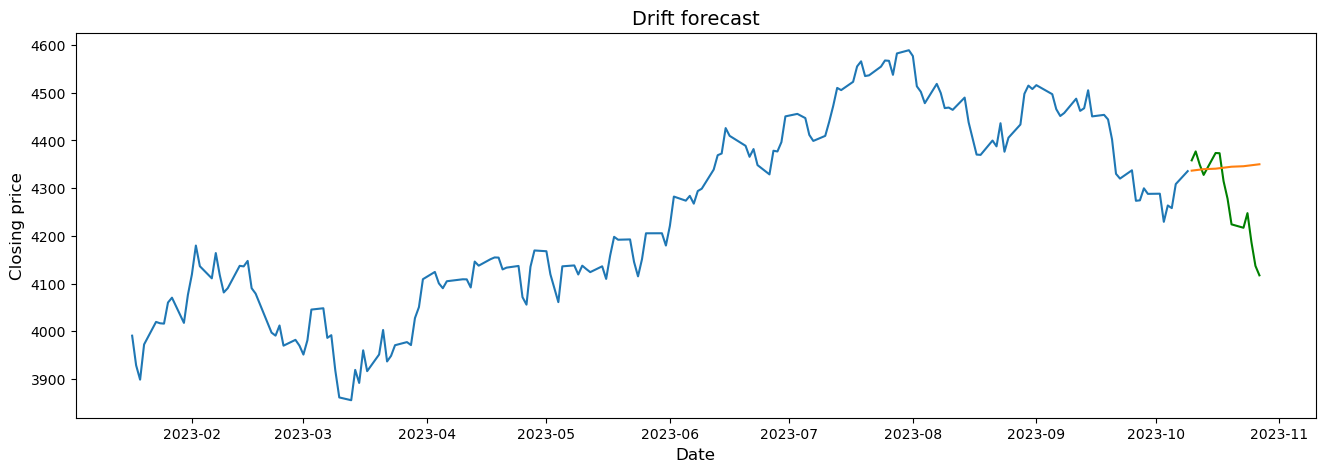

In [28]:
# Close

plt.figure(figsize=(10,5))

plt.figure(figsize=(16,5))

filtered_data = data_train[data_train['Date'] >= '2023-01-15']

plt.plot(filtered_data['Date'], 
         filtered_data['Close'],
           #'-o',
            label = "Training Data")

plt.plot(data_test.Date,
            data_test.Close,
            color = 'green',
            label="Test Data")


plt.plot(data_test.Date,
            drift_pred_1,
            #'r--',
            label="Trend Forecast Prediction")


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing price", fontsize=12)

plt.title("Drift forecast", fontsize=14)
    
plt.show()

<Figure size 1000x500 with 0 Axes>

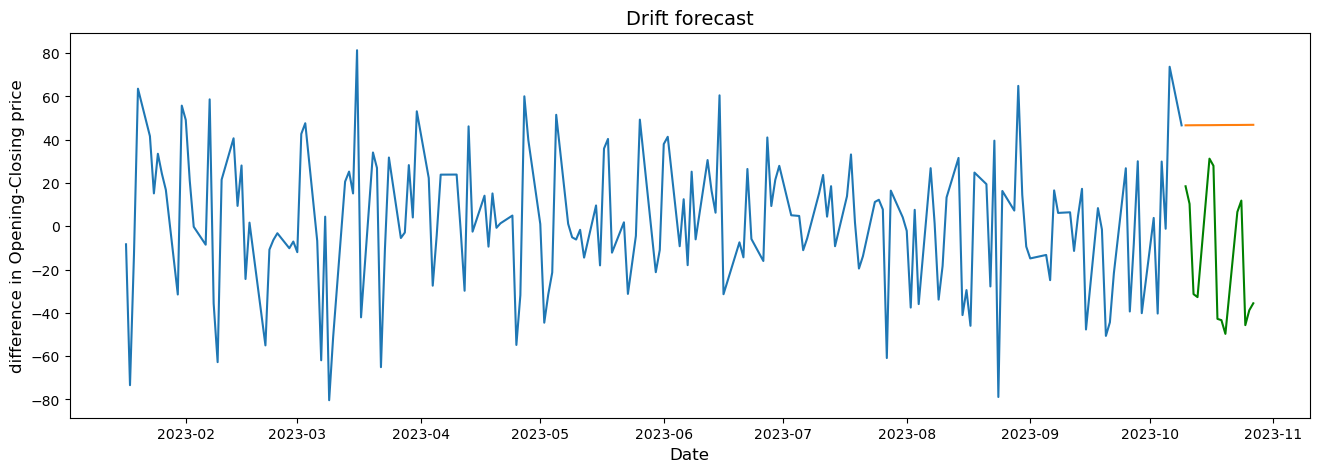

In [29]:
# OpCl

plt.figure(figsize=(10,5))

plt.figure(figsize=(16,5))

filtered_data = data_train[data_train['Date'] >= '2023-01-15']

plt.plot(filtered_data['Date'], 
         filtered_data['OpCl'],
           #'-o',
            label = "Training Data")

plt.plot(data_test.Date,
            data_test.OpCl,
            color = 'green',
            label="Test Data")


plt.plot(data_test.Date,
            drift_pred_2,
            #'r--',
            label="Drift Prediction")


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("difference in Opening-Closing price", fontsize=12)

plt.title("Drift forecast", fontsize=14)

    
plt.show()

In [10]:
# Calculate the average cross-validation root mean squared error for these models. 
# Set up this cross-validation so that there are ten splits and each holdout set only has three observations in it.

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [11]:
mses_cl = np.zeros((4,10))   # 4 is the number of models, 10 is the number of splits

mses_OpCl = np.zeros((4,10))

kfold = TimeSeriesSplit(10, 
                     test_size=3)

In [12]:
j = 0  # counter for the kfold split

for train_index, test_index in kfold.split(data_train):
    data_tt = data_train.loc[train_index]
    data_ho = data_train.loc[test_index]

        
    ############## average ##############  
        #Close
    tt_close_avg = data_tt.Close.mean()
    
    mses_cl[0,j] = np.sqrt(mean_squared_error(data_ho.Close,
                                    tt_close_avg*np.ones(3)))
        #OpCl
    tt_OpCl_avg = data_train.OpCl.mean()
    
    mses_OpCl[0,j] = np.sqrt(mean_squared_error(data_ho.OpCl,
                                    tt_OpCl_avg*np.ones(3)))
        
    
    ############### naive ###############
         #Close
    tt_naive_close = data_tt.Close.values[-1]
    
    mses_cl[1,j] = np.sqrt(mean_squared_error(data_ho.Close.values,
                                    tt_naive_close*np.ones(3)))
        #OpCl
    tt_naive_OpCl = data_tt.OpCl.values[-1]
    
    mses_OpCl[1,j] = np.sqrt(mean_squared_error(data_ho.OpCl.values,
                                    tt_naive_OpCl*np.ones(3)))
    
    
    ############## trend ###############
    
    slr1 = LinearRegression()
    slr2 = LinearRegression()
        
        #Close
    slr1.fit(np.arange(1, len(data_tt) + 1).reshape(-1,1),
              data_tt.Close)
    tt_close_pred = slr1.predict(np.arange(len(data_tt)+1, len(data_tt) + len(data_ho) + 1).reshape(-1,1))
    
    mses_cl[2,j] = np.sqrt(mean_squared_error(data_ho.Close.values,
                                             tt_close_pred))

        #OpCl
    slr2.fit(np.arange(1, len(data_tt) + 1).reshape(-1,1),
              data_tt.OpCl)
    tt_OpCl_pred = slr2.predict(np.arange(len(data_tt)+1, len(data_tt) + len(data_ho) + 1).reshape(-1,1))
    
    mses_OpCl[2,j] = np.sqrt(mean_squared_error(data_ho.OpCl.values,
                                             tt_OpCl_pred))

    ################## drift ############
    
       # Close
    beta_hat_1 = data_tt.Close.diff().mean()
    drift_pred_1 = data_tt.Close.values[-1] + beta_hat_1*np.arange(1,len(data_ho) + 1)
    mses_cl[3,j] = np.sqrt(mean_squared_error(data_ho.Close.values,
                                             drift_pred_1))

       #OpCl
    beta_hat_2 = data_tt.OpCl.diff().mean()
    drift_pred_2 = data_tt.OpCl.values[-1] + beta_hat_2*np.arange(1,len(data_ho) + 1)
    mses_OpCl[3,j] = np.sqrt(mean_squared_error(data_ho.OpCl.values,
                                             drift_pred_2))
    j +=1

In [13]:
##_avg kfold mse_cl?
np.mean(np.sqrt(mses_cl), axis=1)    # mses_cl is 4x10

array([38.09883318,  5.98730994,  9.91210654,  6.01781922])

In [14]:
## avg kfold mse_OpCl?
np.mean(np.sqrt(mses_OpCl), axis=1)

array([5.19713084, 5.6569849 , 5.20373562, 5.65768822])

#### moving average 

The window size that minimized the avg. cv rmse was q = 2 . It had a mean cv rmse of 46.355


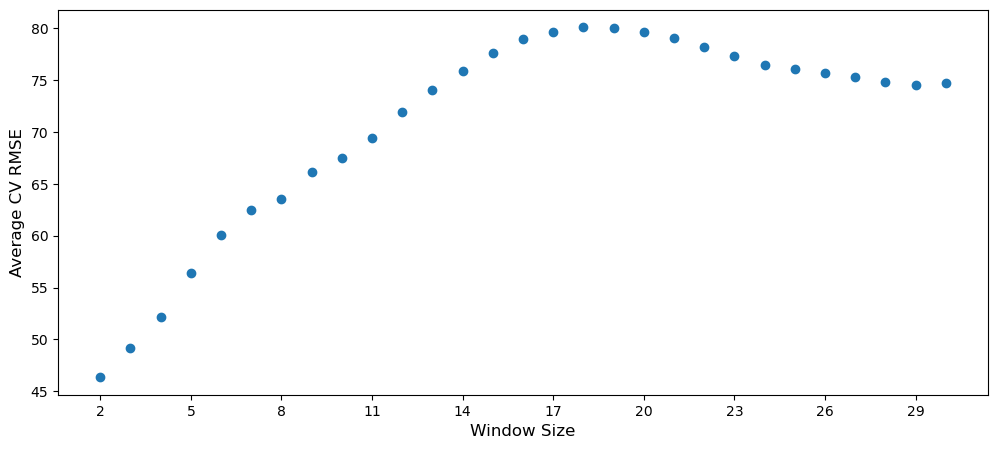

In [35]:
## Finding the best window size for Close

kfold = TimeSeriesSplit(10, test_size=3)
start = 2
end = 31
ma_rmses = np.zeros((10, len(range(start, end))))


i = 0  # counter for the kfold split

for train_index, test_index in kfold.split(data_train):
    data_tt = data_train.loc[train_index]
    data_ho = data_train.loc[test_index]
    
    j = 0
    for q in range(start, end):
        pred = data_tt.Close[-q:].mean() * np.ones(len(data_ho))
       
        ma_rmses[i,j] = np.sqrt(mean_squared_error(data_ho.Close.values, pred))
        
        j = j + 1
    i = i + 1

print("The window size that minimized the avg. cv rmse",
      "was q =", 
      range(start,end)[np.argmin(np.mean(ma_rmses, axis=0))],
      "\b.",
      "It had a mean cv rmse of", 
      np.round(np.min(np.mean(ma_rmses, axis=0)), 3))    
    
    
    ## This will plot the average cv rmses as a function of q
plt.figure(figsize=(12,5))

plt.scatter(range(start,end), np.mean(ma_rmses, axis=0))

plt.xlabel("Window Size", fontsize=12)
plt.ylabel("Average CV RMSE", fontsize=12)

plt.xticks(range(start, end, 3), fontsize=10)
plt.yticks(fontsize=10)

plt.show()


The window size that minimized the avg. cv rmse was q = 30 . It had a mean cv rmse of 28.48


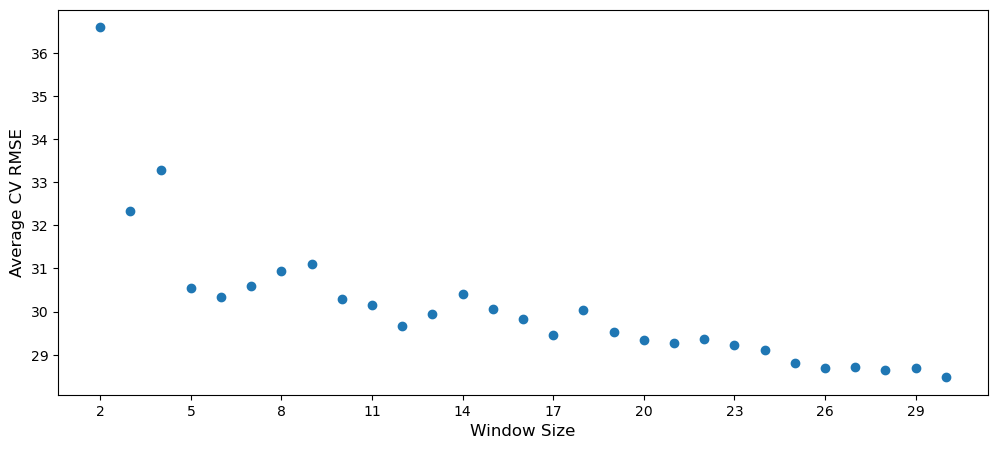

In [36]:
## Finding the best window size for OpCl

kfold = TimeSeriesSplit(10, test_size=3)
start = 2
end = 31
ma_rmses = np.zeros((10, len(range(start, end))))


i = 0  # counter for the kfold split

for train_index, test_index in kfold.split(data_train):
    data_tt = data_train.loc[train_index]
    data_ho = data_train.loc[test_index]
    
    j = 0
    for q in range(start, end):
        pred = data_tt.OpCl[-q:].mean() * np.ones(len(data_ho))
       
        ma_rmses[i,j] = np.sqrt(mean_squared_error(data_ho.OpCl.values, pred))
        
        j = j + 1
    i = i + 1
    
print("The window size that minimized the avg. cv rmse",
      "was q =", 
      range(start,end)[np.argmin(np.mean(ma_rmses, axis=0))],
      "\b.",
      "It had a mean cv rmse of", 
      np.round(np.min(np.mean(ma_rmses, axis=0)), 3))

    ## This will plot the average cv rmses as a function of q
plt.figure(figsize=(12,5))

plt.scatter(range(start,end), np.mean(ma_rmses, axis=0))

plt.xlabel("Window Size", fontsize=12)
plt.ylabel("Average CV RMSE", fontsize=12)

plt.xticks(range(start, end, 3), fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [15]:
window_size_cl = 2 

#Close
moving_average_close = data_train['Close'].rolling(window=window_size_cl).mean()

In [16]:
window_size_OpCl = 30

#Close
moving_average_OpCl = data_train['OpCl'].rolling(window=window_size_OpCl).mean()

In [17]:
### mean square error
ma_cl = np.zeros((1, 10))
ma_OpCl = np.zeros((1, 10))
j = 0  # counter for the kfold split

for train_index, test_index in kfold.split(data_train):
    data_tt = data_train.loc[train_index]
    data_ho = data_train.loc[test_index]

    # Calculate the moving average for 'Close'
    tt_close_moving_avg = data_tt['Close'].rolling(window=window_size_cl).mean().values[-1]

    # Calculate the moving average for 'OpCl'
    tt_OpCl_moving_avg = data_tt['OpCl'].rolling(window=window_size_OpCl).mean().values[-1]

    # Calculate RMSE for 'Close'
    ma_cl[0, j] = np.sqrt(mean_squared_error(data_ho['Close'].values, tt_close_moving_avg * np.ones(len(data_ho))))

    # Calculate RMSE for 'OpCl'
    ma_OpCl[0, j] = np.sqrt(mean_squared_error(data_ho['OpCl'].values, tt_OpCl_moving_avg * np.ones(len(data_ho))))

    j += 1

# Append the results for the moving average method to mses_cl and mses_OpCl
mses_cl = np.vstack((mses_cl, ma_cl))
mses_OpCl = np.vstack((mses_OpCl, ma_OpCl))

In [18]:
np.mean(np.sqrt(mses_cl), axis=1)    # mses_cl is 5x10

array([38.09883318,  5.98730994,  9.91210654,  6.01781922,  6.47897503])

In [19]:
np.mean(np.sqrt(mses_OpCl), axis=1)  

array([5.19713084, 5.6569849 , 5.20373562, 5.65768822, 5.16037284])

#### Double exponential smoothing

In [20]:
from statsmodels.tsa.holtwinters import Holt

In [ ]:
#### The following needs a lot of time to run to give better results 

# Maybe (15,4) is good for CLose or (7,7)

In [23]:
## This gives us the indices of the smallest avg cv rmse    Close

exp_rmses_close = np.zeros((10, len(np.arange(0, 0.2, .01)), len(np.arange(0, 0.2, .01))))
exp_rmses_OpCl = np.zeros((10, len(np.arange(0, 0.2, .01)), len(np.arange(0, 0.2, .01))))

i = 0
for train_index, test_index in kfold.split(data_train):
    data_tt = data_train.loc[train_index]
    data_ho = data_train.loc[test_index]
    
    j = 0
    for alpha in np.arange(0, 0.2, .01):
        k = 0
        for beta in np.arange(0, 0.2, .01):
            print("alpha =", alpha,
                     "beta =", beta)

            exp_smooth_close = Holt(data_tt.Close.values).fit(smoothing_level=alpha, 
                                                                      smoothing_trend=beta,
                                                                      optimized=False)
            exp_smooth_OpCl = Holt(data_tt.OpCl.values).fit(smoothing_level=alpha, 
                                                                      smoothing_trend=beta,
                                                                      optimized=False)

            exp_rmses_close[i,j,k] = np.sqrt(mean_squared_error(data_ho.Close.values, 
                                                          exp_smooth_close.forecast(len(data_ho))))
            exp_rmses_OpCl[i,j,k] = np.sqrt(mean_squared_error(data_ho.OpCl.values, 
                                                          exp_smooth_OpCl.forecast(len(data_ho))))
            k = k + 1
        j = j + 1
    i = i + 1

alpha = 0.0 beta = 0.0
alpha = 0.0 beta = 0.01
alpha = 0.0 beta = 0.02
alpha = 0.0 beta = 0.03
alpha = 0.0 beta = 0.04
alpha = 0.0 beta = 0.05
alpha = 0.0 beta = 0.06
alpha = 0.0 beta = 0.07
alpha = 0.0 beta = 0.08
alpha = 0.0 beta = 0.09
alpha = 0.0 beta = 0.1
alpha = 0.0 beta = 0.11
alpha = 0.0 beta = 0.12
alpha = 0.0 beta = 0.13
alpha = 0.0 beta = 0.14
alpha = 0.0 beta = 0.15
alpha = 0.0 beta = 0.16
alpha = 0.0 beta = 0.17
alpha = 0.0 beta = 0.18
alpha = 0.0 beta = 0.19
alpha = 0.01 beta = 0.0
alpha = 0.01 beta = 0.01
alpha = 0.01 beta = 0.02
alpha = 0.01 beta = 0.03
alpha = 0.01 beta = 0.04
alpha = 0.01 beta = 0.05
alpha = 0.01 beta = 0.06
alpha = 0.01 beta = 0.07
alpha = 0.01 beta = 0.08
alpha = 0.01 beta = 0.09
alpha = 0.01 beta = 0.1
alpha = 0.01 beta = 0.11
alpha = 0.01 beta = 0.12
alpha = 0.01 beta = 0.13
alpha = 0.01 beta = 0.14
alpha = 0.01 beta = 0.15
alpha = 0.01 beta = 0.16
alpha = 0.01 beta = 0.17
alpha = 0.01 beta = 0.18
alpha = 0.01 beta = 0.19
alpha = 0.02 beta = 0.0


Traceback (most recent call last):
  File "C:\Users\mix3f\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\mix3f\AppData\Local\Temp\ipykernel_15328\348893960.py", line 21, in <module>
    exp_smooth_OpCl = Holt(data_tt.OpCl.values).fit(smoothing_level=alpha,
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mix3f\anaconda3\Lib\site-packages\pandas\util\_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mix3f\anaconda3\Lib\site-packages\pandas\util\_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mix3f\anaconda3\Lib\site-packages\pandas\util\_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mix3f\anaconda3\Lib\site-packages\statsm

In [24]:
exp_ind_close = np.unravel_index(np.argmin(np.mean(exp_rmses_close, axis=0), axis=None), 
                           np.mean(exp_rmses_close, axis=0).shape)
np.unravel_index(np.argmin(np.mean(exp_rmses_close, axis=0), axis=None), 
                 np.mean(exp_rmses_close, axis=0).shape)

(11, 15)

In [25]:
print("The alpha and beta values that give a double exponential",
         "smoothing model with lowest avg cv rmse are",
         "alpha = ", np.arange(0, 0.2, .01)[exp_ind_close[0]],
         "and beta = ", np.arange(0, 0.2, .01)[exp_ind_close[1]])

print("This model had an avg cv rmse of",
         np.round(np.mean(exp_rmses_close, axis=0)[exp_ind_close],3))

The alpha and beta values that give a double exponential smoothing model with lowest avg cv rmse are alpha =  0.11 and beta =  0.15
This model had an avg cv rmse of 0.0


In [94]:
## This gives us the indices of the smallest avg cv rmse    OpCl

In [29]:
exp_ind_OpCl = np.unravel_index(np.argmin(np.mean(exp_rmses_OpCl, axis=0), axis=None), 
                           np.mean(exp_rmses_OpCl, axis=0).shape)
np.unravel_index(np.argmin(np.mean(exp_rmses_OpCl, axis=0), axis=None), 
                 np.mean(exp_rmses_OpCl, axis=0).shape)

(11, 15)

In [30]:
print("The alpha and beta values that give a double exponential",
         "smoothing model with lowest avg cv rmse are",
         "alpha = ", np.arange(0, 0.2, .01)[exp_ind_OpCl[0]],
         "and beta = ", np.arange(0, 0.2, .01)[exp_ind_OpCl[1]])

print("This model had an avg cv rmse of",
         np.round(np.mean(exp_rmses_OpCl, axis=0)[exp_ind_OpCl],3))

The alpha and beta values that give a double exponential smoothing model with lowest avg cv rmse are alpha =  0.11 and beta =  0.15
This model had an avg cv rmse of 0.0


#### ARIMA

In [31]:
import statsmodels.api as sm

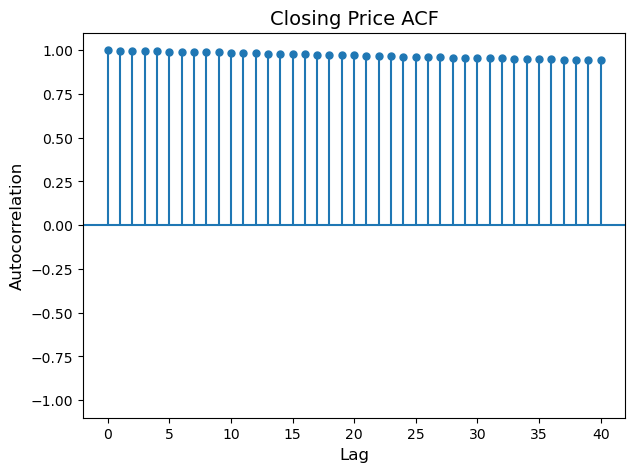

In [49]:
# Close

fig, ax = plt.subplots(1, 1, figsize=(7,5))

sm.graphics.tsa.plot_acf(data_train.Close,
                            alpha=None,
                            lags = 40,
                            ax = ax)

plt.title('Closing Price ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()



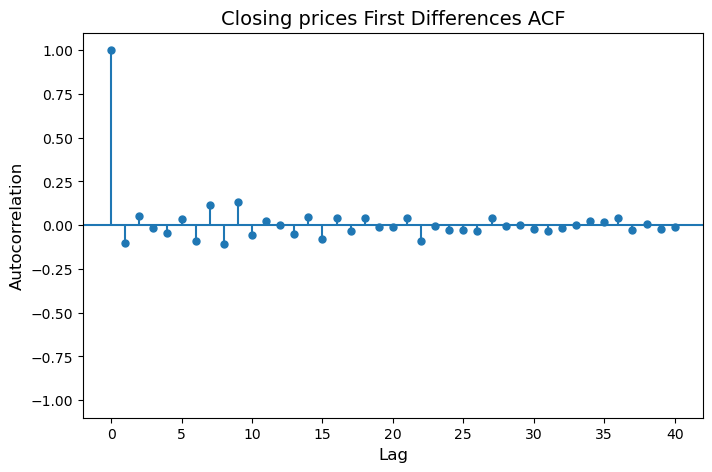

In [51]:
# Close:: 1st differences

fig, ax = plt.subplots(1, 1, figsize=(8,5))

sm.graphics.tsa.plot_acf(data_train.Close.diff().values[1:],
                               alpha=None,
                               lags=40,
                               ax=ax)

plt.title('Closing prices First Differences ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

In [32]:
from statsmodels.tsa.api import SARIMAX

In [33]:
#### To find the best p and q:  You can try (3,3)

arima_rmses = np.zeros((10, 4, 4))

i = 0
for train_index, test_index in kfold.split(data_train):
    data_tt = data_train.iloc[train_index]
    data_ho = data_train.iloc[test_index]
    
    j = 0
    for p in range(4):
        k = 0
        for q in range(4):
            arima = SARIMAX(data_tt.Close.values,
                               order=(p, 1, q)).fit(maxiter=500)
            
            arima_rmses[i,j,k] = np.sqrt(mean_squared_error(data_ho.Close.values, 
                                                   arima.forecast(len(data_ho))))
            k = k +1
        j = j + 1
    i = i +1

C:\Users\mix3f\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mix3f\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mix3f\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mix3f\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mix3f\anaconda3\Lib\s

KeyboardInterrupt: 

In [34]:
arima_ind_close = np.unravel_index(np.argmin(np.mean(arima_rmses, axis=0), axis=None), 
                             np.mean(arima_rmses, axis=0).shape)
np.unravel_index(np.argmin(np.mean(arima_rmses, axis=0), axis=None), 
                 np.mean(arima_rmses, axis=0).shape)

(3, 3)

In [35]:
print("The p and q values that give an ARIMA model",
         "with lowest avg cv mse are",
         "p = ", range(4)[arima_ind_close[0]],
         "and q = ", range(4)[arima_ind_close[1]])

print("This model had an avg cv mse of",
         np.round(np.mean(arima_rmses, axis=0)[arima_ind_close],3))

The p and q values that give an ARIMA model with lowest avg cv mse are p =  3 and q =  3
This model had an avg cv mse of 9.15


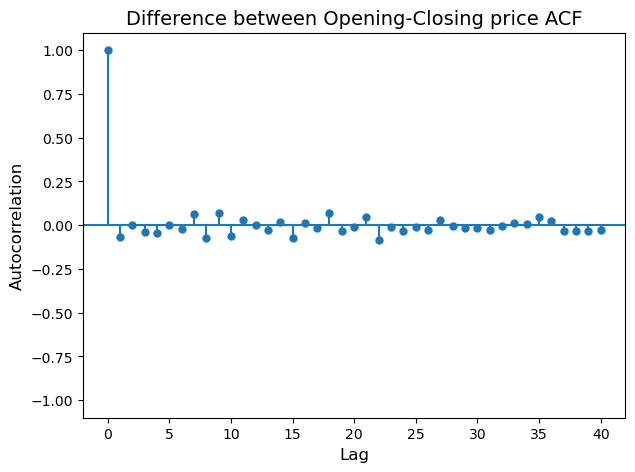

In [50]:
# OpCl

fig, ax = plt.subplots(1, 1, figsize=(7,5))

sm.graphics.tsa.plot_acf(data_train.OpCl,
                            alpha=None,
                            lags = 40,
                            ax = ax)

plt.title('Difference between Opening-Closing price ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()


In [36]:
# You can try (3,3)


arima_rmses_OpCl = np.zeros((10, 4, 4))

i = 0
for train_index, test_index in kfold.split(data_train):
    data_tt = data_train.iloc[train_index]
    data_ho = data_train.iloc[test_index]
    
    j = 0
    for p in range(4):
        k = 0
        for q in range(4):
            arima_OpCl = SARIMAX(data_tt.OpCl.values,
                               order=(p, 1, q)).fit(maxiter=500)
            
            arima_rmses_OpCl[i,j,k] = np.sqrt(mean_squared_error(data_ho.OpCl.values, 
                                                   arima.forecast(len(data_ho))))
            k = k +1
        j = j + 1
    i = i +1

C:\Users\mix3f\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mix3f\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mix3f\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mix3f\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mix3

KeyboardInterrupt: 

In [37]:
arima_ind_OpCl = np.unravel_index(np.argmin(np.mean(arima_rmses_OpCl, axis=0), axis=None), 
                             np.mean(arima_rmses_OpCl, axis=0).shape)
np.unravel_index(np.argmin(np.mean(arima_rmses_OpCl, axis=0), axis=None), 
                 np.mean(arima_rmses_OpCl, axis=0).shape)

(3, 3)

In [38]:
print("The p and q values that give an ARIMA model",
         "with lowest avg cv mse are",
         "p = ", range(4)[arima_ind_OpCl[0]],
         "and q = ", range(4)[arima_ind_OpCl[1]])

print("This model had an avg cv mse of",
         np.round(np.mean(arima_rmses_OpCl, axis=0)[arima_ind_OpCl],3))

The p and q values that give an ARIMA model with lowest avg cv mse are p =  3 and q =  3
This model had an avg cv mse of 0.0


In [39]:
# Rmse so far: average, naive, trend, drift, moving average, double exponential,
# for Close

result_close = np.append( np.mean(np.sqrt(mses_cl), axis=1),  np.sqrt(np.round(np.mean(exp_rmses_close, axis=0)[exp_ind_close],3)) )
result_close = np.append(result_close, np.sqrt( np.round(np.mean(arima_rmses, axis=0)[arima_ind_close],3)) )
result_close

array([38.09883318,  5.98730994,  9.91210654,  6.01781922,  6.47897503,
        0.        ,  3.02489669])

In [40]:
# Rmse so far: average, naive, trend, drift, moving average, double exponential,
# for OpCl

result_OpCl = np.append( np.mean(np.sqrt(mses_OpCl), axis=1),  np.sqrt(np.round(np.mean(exp_rmses_OpCl, axis=0)[exp_ind_OpCl],3)))
result_OpCl = np.append( result_OpCl, np.sqrt( np.round(np.mean(arima_rmses_OpCl, axis=0)[arima_ind_OpCl],3) )   )
result_OpCl

array([5.19713084, 5.6569849 , 5.20373562, 5.65768822, 5.16037284,
       0.        , 0.        ])

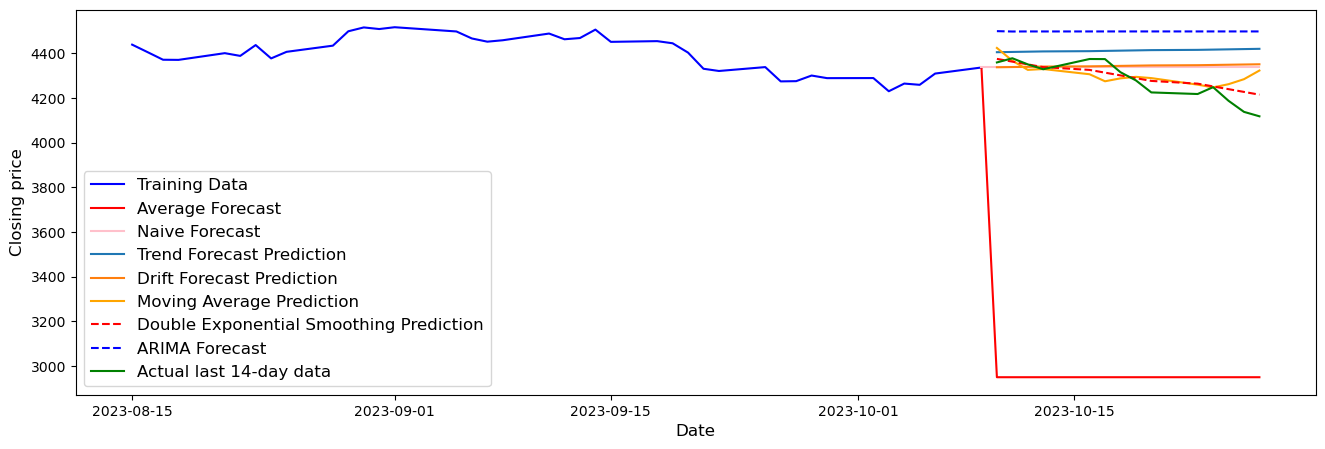

In [42]:
######### Close : all models together

# need to rerun the command for the drift:


plt.figure(figsize=(16,5))

# plt.plot(data_train.Date, data_train.Close, label="Training Data")

filtered_data = data_train[data_train['Date'] >= '2023-08-15']

plt.plot(filtered_data['Date'], 
         filtered_data['Close'],
            color='blue',
           # '-o',
            label = "Training Data")


# Find the last date in the training data
last_training_date = data_train.Date.iloc[-1]

########### Average forecast

# Plot the "testsize"-day average forecast using a line and connect it to the last training data point
plt.plot([last_training_date] + data_test.Date.tolist(), 
         [data_train.Close.iloc[-1]] + [train_close_avg] * testsize, 
         color='red', 
         #linestyle='--', 
         label="Average Forecast")

# plt.scatter(data_test.Date,
#             train_close_avg*np.ones(testsize),
#             marker='x',
#             s=150,
#             color='red',
#             label="Average Forecast")


########### Naive forecast

plt.plot([last_training_date] + data_test.Date.tolist(), 
         [data_train.Close.iloc[-1]] + [naive_close] * testsize, 
         color='pink', 
         #linestyle='--', 
         label="Naive Forecast")

########### Trend forecast
plt.plot(data_test.Date,
            trend_close_pred,
            #'r--',
            label="Trend Forecast Prediction")

############ drift forecast

plt.plot(data_test.Date,
            drift_pred_1,
            #'r--',
            label="Drift Forecast Prediction")

############ moving average
plt.plot(data_test.Date, moving_average_close[-testsize:], color='orange', label="Moving Average Prediction")

########### double exponential ############
plt.plot(data_test.Date, 
         exp_smooth_close.forecast(testsize),
         'r--',
         label="Double Exponential Smoothing Prediction")

################# arima ###################
plt.plot(data_test.Date, 
         arima.forecast(testsize),
         'b--',
         label="ARIMA Forecast")



# plot the actual data of the last testsize days
plt.plot(data_test.Date, data_test.Close, color='green', label="Actual last "+str(testsize)+"-day data")

plt.legend(fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing price", fontsize=12)

# plt.title("Average forecast", fontsize=14)

    
plt.show()

<Figure size 1000x500 with 0 Axes>

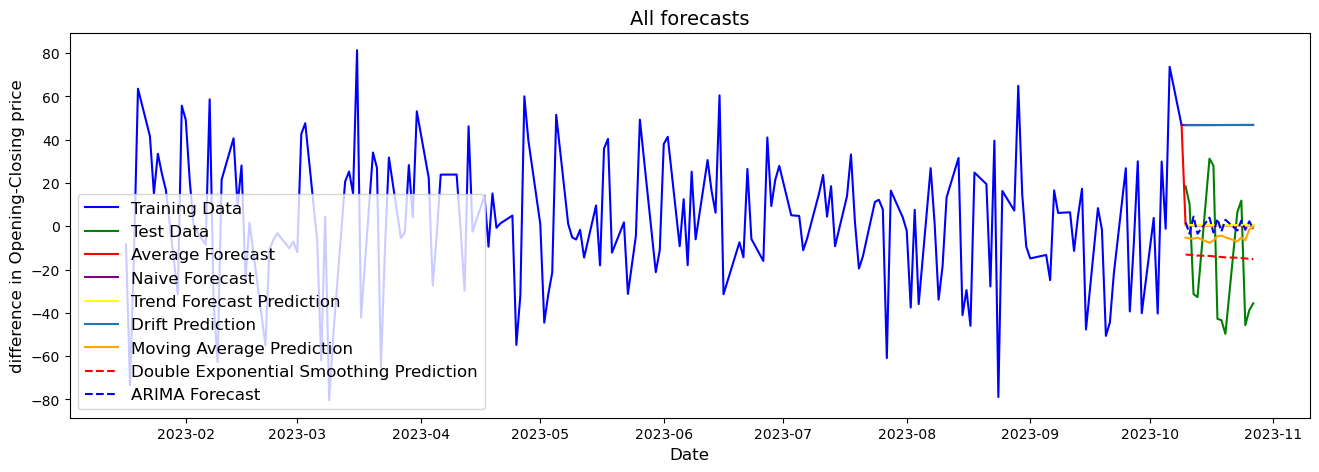

In [43]:
#### OpCl: all models together

plt.figure(figsize=(10,5))

plt.figure(figsize=(16,5))

filtered_data = data_train[data_train['Date'] >= '2023-01-15']

plt.plot(filtered_data['Date'], 
         filtered_data['OpCl'],
           color = 'blue',#'-o',
            label = "Training Data")

plt.plot(data_test.Date,
            data_test.OpCl,
            color = 'green',
            label="Test Data")


############## average ####################
plt.plot([last_training_date] + data_test.Date.tolist(), 
         [data_train.OpCl.iloc[-1]] + [train_OpCl_avg] * testsize, 
         color='red', 
         #linestyle='--', 
         label="Average Forecast")



############# naive #######################
plt.plot([last_training_date] + data_test.Date.tolist(), 
         [data_train.OpCl.iloc[-1]] + [naive_OpCl] * testsize, 
         color='purple', 
         #linestyle='--', 
         label="Naive Forecast")



############### trend ######################
plt.plot(data_test.Date,
            trend_OpCl_pred, color = 'yellow',
            #'r--',
            label="Trend Forecast Prediction")

############## drift ######################
plt.plot(data_test.Date,
            drift_pred_2,
            #'r--',
            label="Drift Prediction")

############ moving average ################
plt.plot(data_test.Date, moving_average_OpCl[-testsize:], color='orange', label="Moving Average Prediction")


########### double exponential ############
plt.plot(data_test.Date, 
         exp_smooth_OpCl.forecast(testsize),
         'r--',
         label="Double Exponential Smoothing Prediction")


################ arima ###################
plt.plot(data_test.Date, 
         arima_OpCl.forecast(testsize),
         'b--',
         label="ARIMA Forecast")





plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("difference in Opening-Closing price", fontsize=12)

plt.title("All forecasts", fontsize=14)

plt.legend(fontsize=12)
    
plt.show()

In [ ]:
## I am going to use the double exponential for the closing price and ARIMA for the dependence between closing-opening.

In [50]:
# Extend Your Date Range

last_date = data['Date'].iloc[-1]
next_date = last_date + pd.DateOffset(days=1)  # Add one day to the last date
date_range = pd.date_range(start=last_date, end=next_date)

In [61]:
# Create a DataFrame with Extended Date Range
pred_data = pd.DataFrame({'Date': date_range, 'Close': [np.nan] * len(date_range), 'OpCl': [np.nan] * len(date_range)}) 
new_data = pd.DataFrame([data.iloc[-1]], columns=['Date', 'Close', 'OpCl'])
pred_data.iloc[0] = new_data.iloc[-1]
pred_data

,Date,Close,OpCl
0,2023-10-27,4117.37,-35.56
1,2023-10-28,NaN,NaN


In [79]:
# Make Predictions for the Next Day:

###  to fit, I used data  (and not only data_train) because I was satisfied with the model on the data_train.

exp_ind_close =(11,15)

exp_smooth_close = Holt(data.Close.values).fit(smoothing_level= exp_ind_close[0]/100, 
                                                                      smoothing_trend= exp_ind_close[1]/100,
                                                                      optimized=False)
pred_data.loc[pred_data.index[-1], 'Close'] = exp_smooth_close.forecast(steps=1)

p=3
q=3
arima_OpCl = SARIMAX(data['OpCl'].values, order=(p, 1, q)).fit(maxiter=500)
pred_data.loc[pred_data.index[-1], 'OpCl'] = arima_OpCl.forecast(steps=1)


In [80]:
pred_data

,Date,Close,OpCl
0,2023-10-27,4117.370000,-35.560000
1,2023-10-28,4206.658523,5.737595
